In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Time dependant

In [241]:
data = pd.read_csv('soc-sign-bitcoinotc.csv')

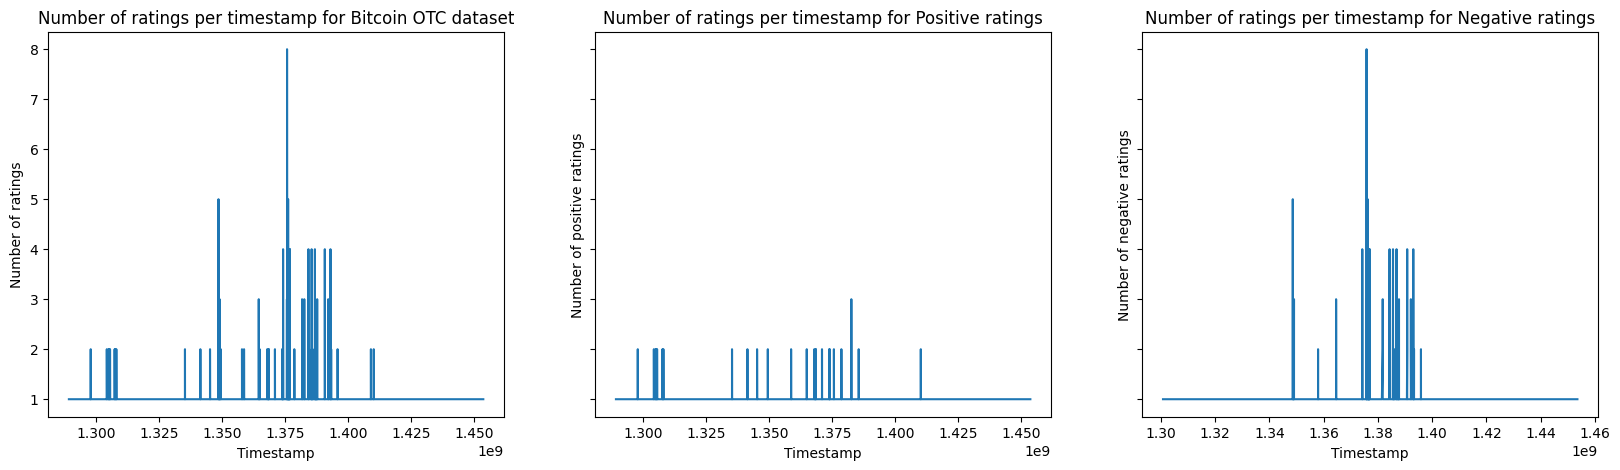

In [266]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
ax[0].plot(data['Timestamp'].value_counts().sort_index())
ax[0].set_xlabel('Timestamp')
ax[0].set_ylabel('Number of ratings')
ax[0].set_title('Number of ratings per timestamp for Bitcoin OTC dataset')
pos = data[data['Weight'] > 0]
neg = data[data['Weight'] < 0]
ax[1].plot(pos['Timestamp'].value_counts().sort_index())
ax[1].set_xlabel('Timestamp')
ax[1].set_ylabel('Number of positive ratings')
ax[1].set_title('Number of ratings per timestamp for Positive ratings')
ax[2].plot(neg['Timestamp'].value_counts().sort_index())
ax[2].set_xlabel('Timestamp')
ax[2].set_ylabel('Number of negative ratings')
ax[2].set_title('Number of ratings per timestamp for Negative ratings')
sharey = True

Source Fraudulent

In [183]:
neg_contri = neg[neg['Weight']==-10]['Timestamp'].value_counts().head(10)
neg_contri_dict = neg_contri.to_dict()

In [185]:
neg_contri_dict

{1375810590: 8,
 1375811107: 6,
 1376233155: 5,
 1348606702: 5,
 1386860976: 4,
 1375811108: 4,
 1376872653: 4,
 1374234176: 4,
 1384292088: 4,
 1376921079: 4}

In [186]:
dict = {}
for i in neg_contri_dict:
    dict[i] = neg[neg['Timestamp'] == i]['Source'].value_counts()

In [187]:
dict

{1375810590: 4458    8
 Name: Source, dtype: int64,
 1375811107: 395    6
 Name: Source, dtype: int64,
 1376233155: 1810    5
 Name: Source, dtype: int64,
 1348606702: 2682    5
 Name: Source, dtype: int64,
 1386860976: 2125    4
 Name: Source, dtype: int64,
 1375811108: 395    4
 Name: Source, dtype: int64,
 1376872653: 2125    4
 Name: Source, dtype: int64,
 1374234176: 3759    4
 Name: Source, dtype: int64,
 1384292088: 2125    4
 Name: Source, dtype: int64,
 1376921079: 2125    4
 Name: Source, dtype: int64}

In [309]:
myKeys = sorted(dict.keys())

In [311]:
sorted_dict = {i: dict[i] for i in myKeys}

(0.0, 10.0)

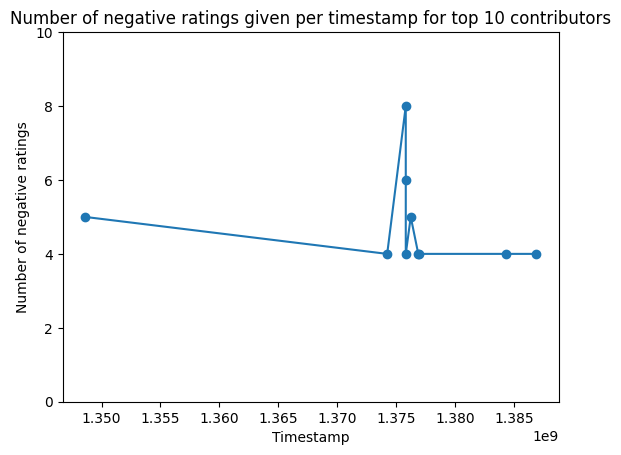

In [315]:
plt.plot(sorted_dict.keys(), sorted_dict.values(), 'o-')
plt.xlabel('Timestamp')
plt.ylabel('Number of negative ratings')
plt.title('Number of negative ratings given per timestamp for top 10 contributors')
plt.ylim(0,10)

Time Independent

Target Fraud

In [220]:
neg_contri = neg[neg['Weight']<-5]['Target'].value_counts().head(10)
neg_contri_dict = neg_contri.to_dict()

In [221]:
neg_contri_dict

{3744: 71,
 1810: 38,
 2028: 32,
 1383: 31,
 2017: 27,
 2498: 27,
 905: 27,
 3897: 26,
 4635: 23,
 4531: 23}

In [222]:
pos_contri = pos[pos['Weight']>5]['Target'].value_counts().head(10)
pos_contri_dict = pos_contri.to_dict()

In [223]:
pos_contri_dict

{1: 53,
 25: 37,
 2642: 30,
 4172: 24,
 7: 23,
 35: 23,
 1018: 22,
 1810: 18,
 2028: 17,
 1201: 15}

Text(0.5, 1.0, 'Rating of user 3744 over time')

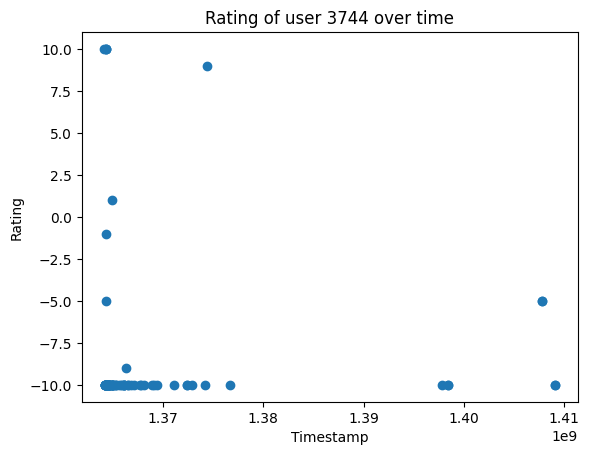

In [296]:
target = 3744
data_speci = data[data['Target'] == target].sort_values(by=['Timestamp'])
plt.plot(data_speci['Timestamp'], data_speci['Weight'], 'o')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.title(f'Rating of user {target} over time')

In [ ]:
fig, ax

In [238]:
print(f"The average rating of user {target} is", data[data['Target'] == target]['Weight'].sum()/data[data['Target'] == target].count()['Weight'])

The average rating of user 3744 is -8.333333333333334


In [239]:
for i in pos_contri_dict:
    print(f"The average rating of user {i} is", 
          data[data['Target'] == i]['Weight'].sum()/data[data['Target'] == i].count()['Weight'])

The average rating of user 1 is 3.5442477876106193
The average rating of user 25 is 2.6106194690265485
The average rating of user 2642 is 2.5266990291262137
The average rating of user 4172 is 2.126126126126126
The average rating of user 7 is 2.8425925925925926
The average rating of user 35 is 1.8990654205607476
The average rating of user 1018 is 2.631284916201117
The average rating of user 1810 is 0.7395498392282959
The average rating of user 2028 is 0.7240143369175627
The average rating of user 1201 is 3.9482758620689653


In [240]:
for i in neg_contri_dict:
    print(f"The average rating of user {i} is", 
          data[data['Target'] == i]['Weight'].sum()/data[data['Target'] == i].count()['Weight'])

The average rating of user 3744 is -8.333333333333334
The average rating of user 1810 is 0.7395498392282959
The average rating of user 2028 is 0.7240143369175627
The average rating of user 1383 is -2.4166666666666665
The average rating of user 2017 is -5.088888888888889
The average rating of user 2498 is -5.688888888888889
The average rating of user 905 is 0.6098484848484849
The average rating of user 3897 is -0.359375
The average rating of user 4635 is -1.3734939759036144
The average rating of user 4531 is -9.2


In [268]:
data

,Source,Target,Weight,Timestamp
0,6,2,4,1289241912
1,6,5,2,1289241942
2,1,15,1,1289243140
3,4,3,7,1289245277
4,13,16,8,1289254254
...,...,...,...,...
35587,4499,1810,1,1453612482
35588,2731,3901,5,1453679428
35589,2731,4897,5,1453679434
35590,13,1128,1,1453679633


In [269]:
data['Weight'].value_counts()

 1     20048
 2      5562
 3      2561
-10     2413
 5      1268
 4       967
 10      765
-1       601
 8       277
 6       265
 7       208
-2       182
-5       179
 9       108
-3        91
-8        31
-4        27
-9        20
-7        14
-6         5
Name: Weight, dtype: int64

In [272]:
pos['Weight'].mean()

1.9653126853788754

In [273]:
pos['Weight'].std()

1.8659529447316023

In [274]:
neg['Weight'].mean()

-7.5573954532697165

In [275]:
neg['Weight'].std()

3.7213065689293674

In [289]:
from scipy.stats import norm

Text(0.5, 1.0, 'Probability density function of ratings')

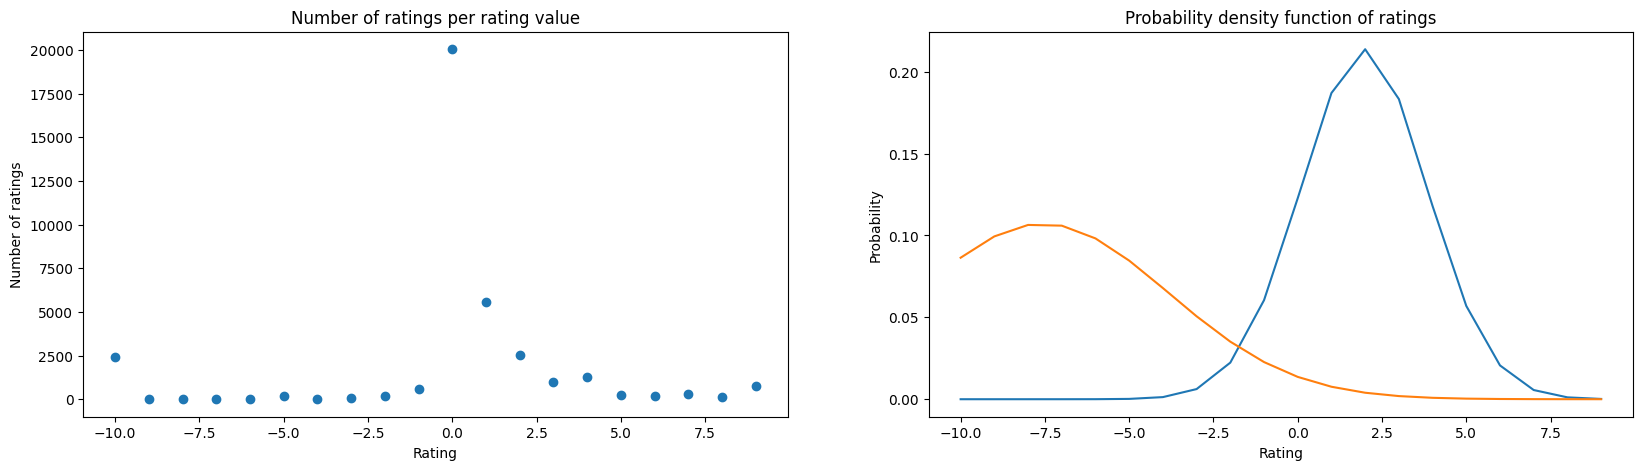

In [290]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(np.arange(-10,10, 1), data['Weight'].value_counts().sort_index(), 'o')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Number of ratings')
ax[0].set_title('Number of ratings per rating value')
ax[1].plot(np.arange(-10,10, 1), norm.pdf(np.arange(-10,10, 1), pos['Weight'].mean(), pos['Weight'].std()))
ax[1].plot(np.arange(-10,10, 1), norm.pdf(np.arange(-10,10, 1), neg['Weight'].mean(), neg['Weight'].std()))
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Probability')
ax[1].set_title('Probability density function of ratings')